In [25]:
import DPP_csv as DPP
import tsne
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [26]:
dpp = DPP.DPP_csv("dataOut.csv")

In [27]:
df, chosen_attributes = dpp.get_data(data_frac=0.3)

333
1 motionGravityY
2 motionGravityZ
3 motionGravityX
4 motionRotationRateZ
5 gyroRotationY
6 motionRotationRateY
7 gyroRotationX
8 motionRotationRateX
9 gyroRotationZ
10 gyroTimestamp
11 motionMagneticFieldY
12 magneticFieldX
13 magneticFieldY
14 motionMagneticFieldZ
15 motionMagneticFieldX
16 magneticFieldZ
17 motionMagneticFieldCalibrationAccuracy
18 locationCourse
19 locationHorizontalAccuracy
20 locationHeadingY
21 locationLongitude
22 locationVerticalAccuracy
23 locationSpeed
24 locationTrueHeading
25 locationAltitude
26 locationTimestamp
27 locationLatitude
28 locationHeadingTimestamp
29 locationHeadingX
30 locationMagneticHeading
31 locationHeadingZ
32 locationHeadingAccuracy
33 accelerometerAccelerationX
34 motionUserAccelerationX
35 accelerometerTimestamp
36 motionUserAccelerationZ
37 accelerometerAccelerationZ
38 accelerometerAccelerationY
39 motionUserAccelerationY
40 orientationAzimuth
41 motionQuaternionZ
42 orientationRoll
43 motionQuaternionW
44 motionAttitudeReference

In [28]:
X = np.array(df)
init_dim = len(df.columns)
reduced_dim = 2

In [29]:
n_clusters = input("Input the number of clusters: ")
kmeans = KMeans(n_clusters)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [31]:
y = tsne.tsne(X,reduced_dim,n_features,30.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  333 ...
Mean value of sigma:  0.149466978737
Iteration  200 : error is  0.551258505581
Iteration  400 : error is  0.547259428864
Iteration  600 : error is  0.547164775633
Iteration  800 : error is  0.547155396325
Iteration  1000 : error is  0.547154207865


In [38]:
X_with_centroids = np.concatenate((X,centroids),axis=0)

In [40]:
y_with_centroids =  tsne.tsne(X_with_centroids,reduced_dim,n_features,30.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  338 ...
Mean value of sigma:  0.151407849938
Iteration  200 : error is  0.527050762798
Iteration  400 : error is  0.52391130558
Iteration  600 : error is  0.523812010886
Iteration  800 : error is  0.523800803837
Iteration  1000 : error is  0.523799200877


In [43]:
reduced_centroids = y_with_centroids[-5:]
y_without_centroids = y_with_centroids[:-5]
len(y_without_centroids)

333

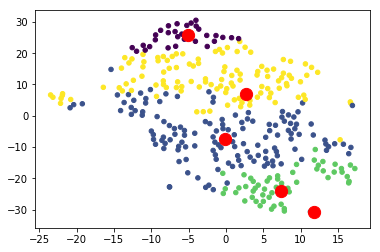

In [47]:
plt.scatter(y_without_centroids[:,0],y_without_centroids[:,1],20,labels)
plt.scatter(reduced_centroids[:,0],reduced_centroids[:,1],150,'r')
plt.show()